In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("../data/logfile-storage-v2.csv", delimiter=";")
dataset.head()

,datacenter_id,datacenter_name,datacenter_storage_energy,storage_id,system,storage_capacity,capacity_used,active_duration,idle_intervals,total_energy_active,total_energy_idle,average_rotation_latency,average_seek_Time,max_internal_data_transfer_rate,idle_power,active_power,files,Unnamed: 17
0,3,datacenter,75010.809264,1,storage,900000.0,20992.0,106.078447,1.000013659472681:,615.254992,3.000041,0.003,0.004,198.0,3.0,5.8,"55596,3072,15.520749003096359:1-269738,1024,5....",NaN
1,3,datacenter,75010.809264,2,storage,900000.0,24064.0,121.605013,1.0000000435601588:,705.309073,3.000000,0.003,0.004,198.0,3.0,5.8,"304608,3584,18.103752520403432:361644,3072,15....",NaN
2,3,datacenter,75010.809264,3,storage,900000.0,27136.0,152.628102,1.000000126982307:,885.242992,3.000000,0.003,0.004,198.0,3.0,5.8,"305050,3584,18.10795200666362:303723,3584,18.1...",NaN
3,3,datacenter,75010.809264,4,storage,900000.0,21504.0,108.669959,1.0000002596075253:,630.285760,3.000001,0.003,0.004,198.0,3.0,5.8,"29-240840,3072,15.522980568943678:1-270738,102...",NaN
4,3,datacenter,75010.809264,5,storage,900000.0,17920.0,106.092757,1.0000005200268733:,615.337989,3.000002,0.003,0.004,198.0,3.0,5.8,"289404,512,2.5953087119314207:4-760114,512,2.5...",NaN


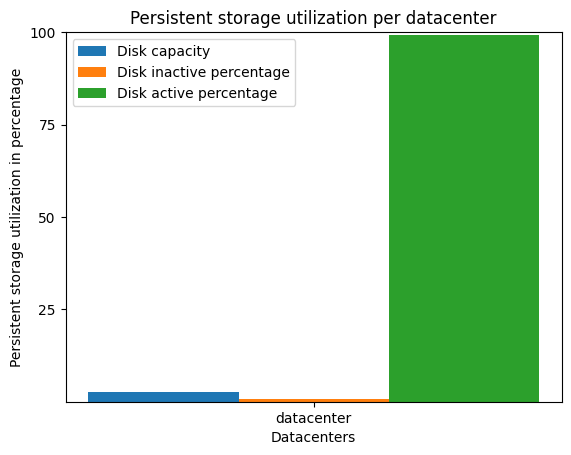

In [6]:
labels, values = np.unique(dataset['datacenter_name'], return_counts=True)
datacenter_total_storage_capacity = np.array([])
datacenter_used_storage_capacity = np.array([])

datacenter_total_duration = np.array([])
datacenter_inactive_duration = np.array([])
datacenter_active_duration = np.array([])

for i in range(len(labels)):
    total_storage_capacity = 0
    used_storage_capacity = 0
    
    total_disk_duration = 0
    disk_inactive_duration = 0
    disk_active_duration = 0
    
    for index, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        total_storage_capacity += sample['storage_capacity']
        used_storage_capacity += sample['capacity_used']
        
        idle_duration = 0
        for idle_interval in sample['idle_intervals'].split(":"):
            if idle_interval != '':
                idle_duration += float(idle_interval)
        disk_inactive_duration += idle_duration
        disk_active_duration += sample['active_duration']
        total_disk_duration += (sample['active_duration'] + idle_duration)
    
    datacenter_total_storage_capacity = np.append(datacenter_total_storage_capacity, total_storage_capacity)
    datacenter_used_storage_capacity = np.append(datacenter_used_storage_capacity, used_storage_capacity)
    
    datacenter_inactive_duration = np.append(datacenter_inactive_duration, disk_inactive_duration)
    datacenter_active_duration = np.append(datacenter_active_duration, disk_active_duration)
    datacenter_total_duration = np.append(datacenter_total_duration, total_disk_duration)


x = np.arange(len(labels))

bar_width = 0.2
plt.bar(x - bar_width, np.divide(datacenter_used_storage_capacity, datacenter_total_storage_capacity)*100, bar_width, label="Disk capacity")
plt.bar(x, np.divide(datacenter_inactive_duration, datacenter_total_duration)*100, bar_width, label="Disk inactive percentage")
plt.bar(x + bar_width, np.divide(datacenter_active_duration, datacenter_total_duration)*100, bar_width, label="Disk active percentage")

plt.xticks(x, labels)
plt.yticks([25, 50, 75, 100])
plt.ylim((0, 100))
plt.xlabel("Datacenters")
plt.ylabel("Persistent storage utilization in percentage")
plt.title("Persistent storage utilization per datacenter")
plt.legend()
plt.show()


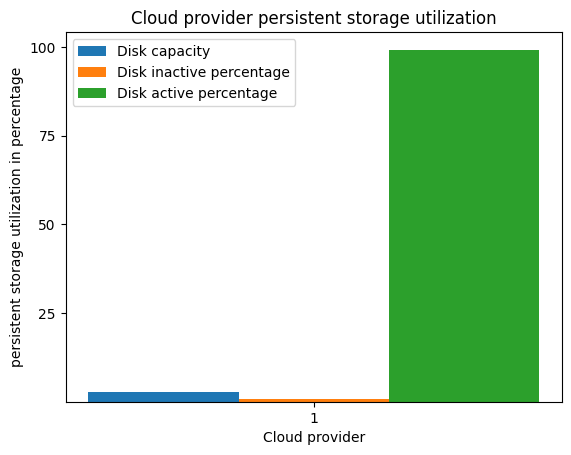

In [7]:
bar_width = 0.2
plt.bar(1 - bar_width, np.mean(datacenter_used_storage_capacity)/np.mean(datacenter_total_storage_capacity)*100, bar_width, label="Disk capacity")
plt.bar(1, np.mean(datacenter_inactive_duration)/np.mean(datacenter_total_duration)*100, bar_width, label="Disk inactive percentage")
plt.bar(1 + bar_width, np.mean(datacenter_active_duration)/np.mean(datacenter_total_duration)*100, bar_width, label="Disk active percentage")
plt.xlabel("Cloud provider")
plt.ylabel("persistent storage utilization in percentage")
plt.xticks([1])
plt.yticks([25,50,75,100])
plt.title("Cloud provider persistent storage utilization")
plt.legend()
plt.show()

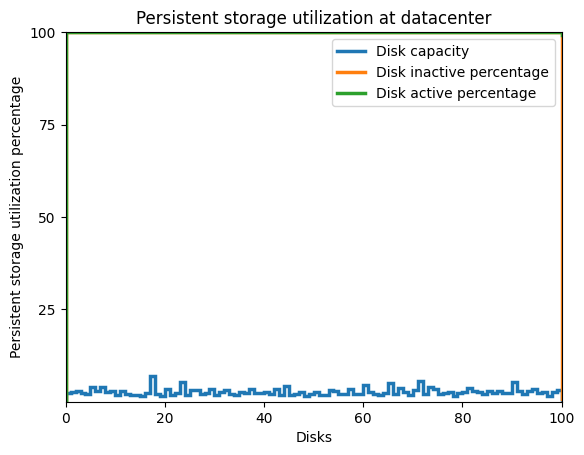

In [8]:
labels = np.unique(dataset['datacenter_name'])

for i in range(len(labels)):
    disk_capacity = np.array([])
    disk_capacity_used = np.array([])
    
    disk_total_duration = np.array([])
    disk_inactive_duration = np.array([])
    disk_active_duration = np.array([])
    
    for index, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        disk_capacity = np.append(disk_capacity, sample['storage_capacity'])
        disk_capacity_used = np.append(disk_capacity_used, sample['capacity_used'])
        
        idle_duration = 0
        for idle_interval in sample['idle_intervals'].split(":"):
            if idle_interval != '':
                idle_duration += float(idle_interval)
        
        disk_inactive_duration = np.append(disk_capacity, float(idle_duration))
        disk_active_duration = np.append(disk_capacity, float(sample['active_duration']))
        disk_total_duration = np.append(disk_capacity, float(sample['active_duration']) + float(idle_duration))
    
    fig, ax = plt.subplots()
    ax.stairs(np.divide(disk_capacity_used, disk_capacity)*100, linewidth=2.5, label="Disk capacity")
    ax.stairs(np.divide(disk_inactive_duration, disk_total_duration)*100, linewidth=2.5, label="Disk inactive percentage")
    ax.stairs(np.divide(disk_active_duration, disk_total_duration)*100, linewidth=2.5, label="Disk active percentage")
    ax.set(xlim=(0, len(disk_capacity_used)), ylim=(0,100), yticks=np.array([25,50,75,100])) #xticks=np.arange(1,len(host_availablePEs))
    plt.ylabel("Persistent storage utilization percentage")
    plt.xlabel("Disks")
    plt.title(f"Persistent storage utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()